In [18]:
# RMS, MAE같은 측도를 씀
# y value의 유닛을 봐야함
# 집값이 얼마 차이가 난다.하지만 1970년대에 1만불이었을때 물기상승률을 생각해보면 그렇게 오른게 아닐수도 있다고 써야함

#rmse
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

#mape
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [3]:
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (r2_score, mean_absolute_error,mean_squared_error)
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from statsmodels.api import Logit
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.api import Logit

### 데이터셋 구성

In [4]:
df_raw = pd.read_csv("SCALE불량범주화이상치변화.csv", engine = "python", encoding='cp949')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562928,2008-08-01:08:82:22,1,21,4,40.00,2464,25077,77920,2,...,1174,74,1167,60,312,1167,1078.0,1,6,3
1,PB563329,2008-08-02:07:71:13,1,22,4,40.00,2464,26416,41040,2,...,1135,101,1152,66,342,1152,1071.0,1,6,3
2,PB562931,2008-08-01:08:82:11,1,21,4,40.00,2503,10511,33160,1,...,1157,68,1159,67,312,1159,1068.0,1,6,3
3,PB562929,2008-08-01:08:82:02,1,21,4,40.00,2464,25077,77920,2,...,1167,77,1165,58,308,1165,1066.0,1,6,1
4,PB562927,2008-08-01:08:81:45,1,21,4,35.15,2466,31229,106250,3,...,1164,79,1167,61,296,1167,1062.0,1,8,3


In [5]:
df_raw= df_raw.drop(["PLATE_NO","ROLLING_DATE"],axis=1)

In [23]:
df_raw

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1,21,4,40.00,2464,25077,77920,2,1,1174,74,1167,60,312,1167,1078.00,1,6,3
1,1,22,4,40.00,2464,26416,41040,2,1,1135,101,1152,66,342,1152,1071.00,1,6,3
2,1,21,4,40.00,2503,10511,33160,1,2,1157,68,1159,67,312,1159,1068.00,1,6,3
3,1,21,4,40.00,2464,25077,77920,2,2,1167,77,1165,58,308,1165,1066.00,1,6,1
4,1,21,4,35.15,2466,31229,106250,3,2,1164,79,1167,61,296,1167,1062.00,1,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,52,2,40.00,2497,23592,37320,3,1,1119,101,1117,76,383,1117,889.75,1,6,3
716,0,11,4,16.09,2221,43596,61150,3,2,1163,57,1166,67,303,1166,889.75,1,10,4
717,0,11,4,16.09,2221,43596,61150,3,1,1169,64,1164,61,308,1164,889.75,1,10,3
718,0,55,3,40.00,2085,13176,17430,1,2,1130,92,1124,61,362,1124,889.75,1,6,3


# 스케일 변화

In [6]:
v_feature_name=df_raw.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()
df_raw=df_scaled

In [7]:
df_raw

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1.454951,-0.122638,0.300863,1.446244,-0.670963,-0.669107,1.473196,-0.005087,-0.994460,0.894936,-0.291598,0.987115,-0.642224,0.252126,0.987115,2.476312,0.219169,-1.429880,0.422914
1,1.454951,-0.065151,0.300863,1.446244,-0.670963,-0.572210,-0.017861,-0.005087,-0.994460,-0.975397,1.368819,0.132881,-0.195603,0.913519,0.132881,2.339751,0.219169,-1.429880,0.422914
2,1.454951,-0.122638,0.300863,1.446244,-0.567247,-1.723176,-0.336449,-1.226038,1.005571,0.079662,-0.660579,0.531524,-0.121167,0.252126,0.531524,2.281224,0.219169,-1.429880,0.422914
3,1.454951,-0.122638,0.300863,1.446244,-0.670963,-0.669107,1.473196,-0.005087,1.005571,0.559235,-0.107107,0.873217,-0.791098,0.163940,0.873217,2.242207,0.219169,-1.429880,-1.322061
4,1.454951,-0.122638,0.300863,0.984812,-0.665645,-0.223917,2.618577,1.215864,1.005571,0.415363,0.015887,0.987115,-0.567787,-0.100618,0.987115,2.164172,0.219169,-0.196930,0.422914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.687308,1.659445,-1.096695,1.446244,-0.583203,-0.776569,-0.168261,1.215864,-0.994460,-1.742713,1.368819,-1.860333,0.548765,1.817424,-1.860333,-1.196212,0.219169,-1.429880,0.422914
716,-0.687308,-0.697504,0.300863,-0.828569,-1.317198,0.671021,0.795186,1.215864,1.005571,0.367406,-1.337046,0.930166,-0.121167,0.053708,0.930166,-1.196212,0.219169,1.036021,1.295402
717,-0.687308,-0.697504,0.300863,-0.828569,-1.317198,0.671021,0.795186,1.215864,-0.994460,0.655149,-0.906567,0.816269,-0.567787,0.163940,0.816269,-1.196212,0.219169,1.036021,0.422914
718,-0.687308,1.831905,-0.397916,1.446244,-1.678877,-1.530323,-0.972413,-1.226038,1.005571,-1.215184,0.815347,-1.461690,-0.567787,1.354448,-1.461690,-1.196212,0.219169,-1.429880,0.422914


In [8]:
df_raw['SCALE'] = np.where(df_raw["SCALE"]>= -0.5,1,0)

In [9]:
df_raw

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1,-0.122638,0.300863,1.446244,-0.670963,-0.669107,1.473196,-0.005087,-0.994460,0.894936,-0.291598,0.987115,-0.642224,0.252126,0.987115,2.476312,0.219169,-1.429880,0.422914
1,1,-0.065151,0.300863,1.446244,-0.670963,-0.572210,-0.017861,-0.005087,-0.994460,-0.975397,1.368819,0.132881,-0.195603,0.913519,0.132881,2.339751,0.219169,-1.429880,0.422914
2,1,-0.122638,0.300863,1.446244,-0.567247,-1.723176,-0.336449,-1.226038,1.005571,0.079662,-0.660579,0.531524,-0.121167,0.252126,0.531524,2.281224,0.219169,-1.429880,0.422914
3,1,-0.122638,0.300863,1.446244,-0.670963,-0.669107,1.473196,-0.005087,1.005571,0.559235,-0.107107,0.873217,-0.791098,0.163940,0.873217,2.242207,0.219169,-1.429880,-1.322061
4,1,-0.122638,0.300863,0.984812,-0.665645,-0.223917,2.618577,1.215864,1.005571,0.415363,0.015887,0.987115,-0.567787,-0.100618,0.987115,2.164172,0.219169,-0.196930,0.422914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,1.659445,-1.096695,1.446244,-0.583203,-0.776569,-0.168261,1.215864,-0.994460,-1.742713,1.368819,-1.860333,0.548765,1.817424,-1.860333,-1.196212,0.219169,-1.429880,0.422914
716,0,-0.697504,0.300863,-0.828569,-1.317198,0.671021,0.795186,1.215864,1.005571,0.367406,-1.337046,0.930166,-0.121167,0.053708,0.930166,-1.196212,0.219169,1.036021,1.295402
717,0,-0.697504,0.300863,-0.828569,-1.317198,0.671021,0.795186,1.215864,-0.994460,0.655149,-0.906567,0.816269,-0.567787,0.163940,0.816269,-1.196212,0.219169,1.036021,0.422914
718,0,1.831905,-0.397916,1.446244,-1.678877,-1.530323,-0.972413,-1.226038,1.005571,-1.215184,0.815347,-1.461690,-0.567787,1.354448,-1.461690,-1.196212,0.219169,-1.429880,0.422914


# heatmap 그리기

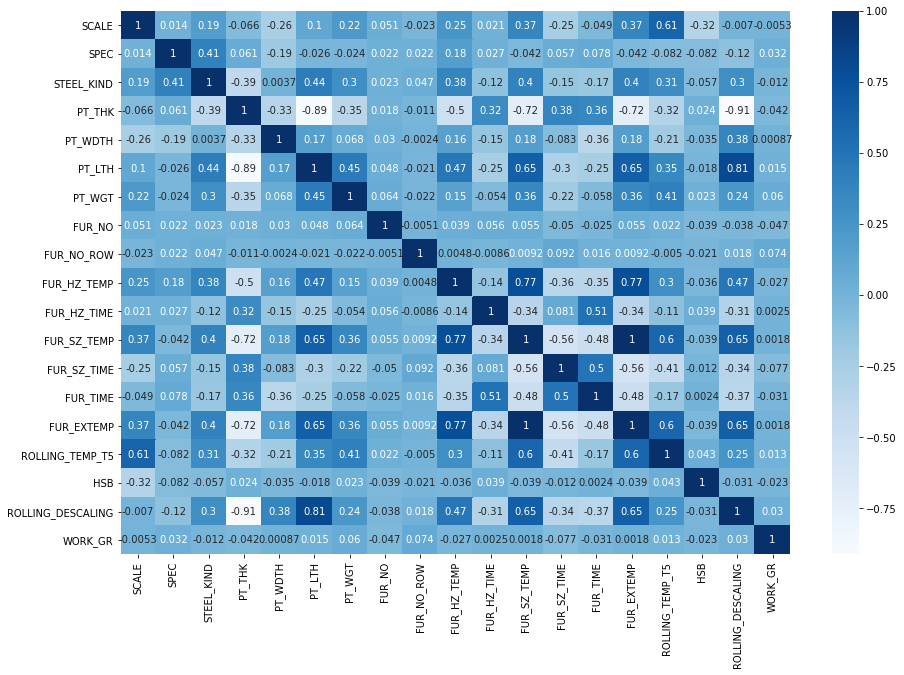

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(df_raw.corr(),annot=True, cmap="Blues")

# 여기서부터 모델 돌릴려고 다시 불러들이기

In [23]:
df_raw_x = df_raw.drop("SCALE",axis = 1)
df_raw_x_const = add_constant(df_raw_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF",inplace = True)
df_vif.round(3)

c:\users\achin\tf1\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variable,VIF
0,const,1.000
16,HSB,1.025
18,WORK_GR,1.034
8,FUR_NO_ROW,1.036
7,FUR_NO,1.060
1,SPEC,1.572
6,PT_WGT,1.620
10,FUR_HZ_TIME,1.746
4,PT_WDTH,1.760
2,STEEL_KIND,1.776


# 모델별로 돌리기

## Decision Tree

In [11]:
df_raw_y = df_raw["SCALE"]
df_raw_x = df_raw.drop("SCALE", axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.2, random_state = 1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y, test_size=3/7, random_state = 1234)

In [30]:
#train 및 test 설명력과 결과 저장
train_accuracy = []; test_accuracy = []
#max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state =1234,
                                  max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]=train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy

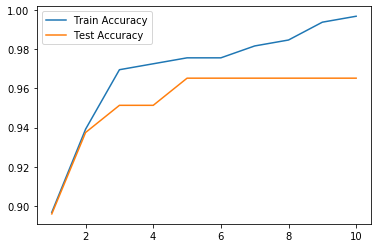

In [31]:
#모델 설명력 그래프 확인
plt.plot(para_depth,train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth,test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [32]:
#train 및 test 설명력과 결과 저장
train_accuracy = []; test_accuracy = []
#min_samples_split: 분리 노드의 최소 자료 수
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state =1234,
                                  max_depth = 4,
                                  min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"]=para_split
df_score_split["TrainAccuracy"]=train_accuracy
df_score_split["TestAccuracy"]=test_accuracy

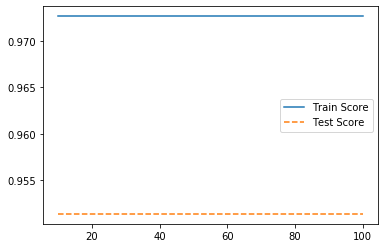

In [33]:
#모델 설명력 그래프 확인
plt.plot(para_split, train_accuracy,linestyle="-", label = "Train Score")
plt.plot(para_split, test_accuracy,linestyle="--", label = "Test Score")
plt.legend()

In [34]:
#train 및 test 설명력 결과 저장
train_accuracy = []; test_accuracy =[]
#min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 4,
                                  min_samples_split = 20,
                                  min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

#결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainScore"]=train_accuracy
df_accuracy_leaf["TestScore"]=test_accuracy

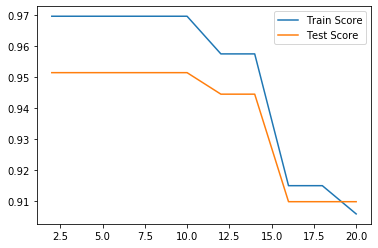

In [35]:
#모델 설명력 그래프 확인
plt.plot(para_leaf,train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_leaf,test_accuracy, linestyle = "-", label = "Test Score")
plt.legend()

### 디시젼트리 최종모델

In [14]:
tree_final =  DecisionTreeClassifier(random_state =1234,
                                     min_samples_leaf = 3,
                                     min_samples_split = 20,
                                     max_depth=4)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=20,
                       random_state=1234)

MSE: 0.04861111111111111
MAE: 0.04861111111111111
RMSE: 0.22047927592204922
MAPE: inf


c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, f

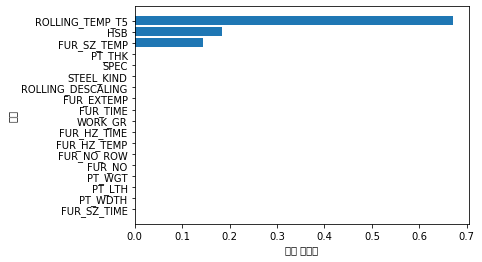

In [22]:
v_feature_name=df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_
df_importance.sort_values("Importance",ascending=False, inplace = True)
df_importance.round(3)

y_pred=tree_final.predict(df_test_x)

df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


print ('MSE:', mean_squared_error(df_test_y, y_pred))
print ('MAE:', mean_absolute_error(df_test_y, y_pred))
print('RMSE:',root_mean_squared_error(df_test_y, y_pred))
print('MAPE:', mean_absolute_percentage_error(df_test_y, y_pred))

In [37]:
#평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.951

Confusion matrix
[[101   2]
 [  5  36]]


In [38]:
#변수명저장
v_feature_name = df_train_x.columns
#tree.feature_importances로 설명 변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance

,Feature,Importance
14,ROLLING_TEMP_T5,0.671778
15,HSB,0.183742
10,FUR_SZ_TEMP,0.144479
0,SPEC,0.000000
1,STEEL_KIND,0.000000
16,ROLLING_DESCALING,0.000000
13,FUR_EXTEMP,0.000000
12,FUR_TIME,0.000000
11,FUR_SZ_TIME,0.000000
9,FUR_HZ_TIME,0.000000


Text(0, 0.5, 'variable')

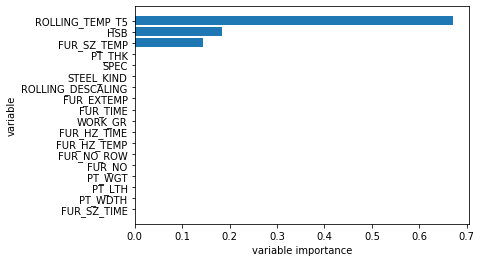

In [39]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("variable importance")
plt.ylabel("variable")

# MLP

### 가장 좋은 모델

In [69]:
nn_uncustomized = MLPClassifier(random_state=1234,hidden_layer_sizes=(10,10,10,10,10,10,10,10),solver="adam",activation="relu")
nn_uncustomized.fit(df_train_x, df_train_y)
print("Score on traning set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Score on val set:{:.3f}".format(nn_uncustomized.score(df_val_x,df_val_y)))

Score on traning set:0.994
Score on val set:0.883


In [70]:
y_pred=nn_uncustomized.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(nn_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.847

Confusion matrix:
[[93 10]
 [12 29]]


# 밑에서부터는 최적값 찾으려고 파라미터 바꿔가면서 그래프 찾은것

c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users

c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users

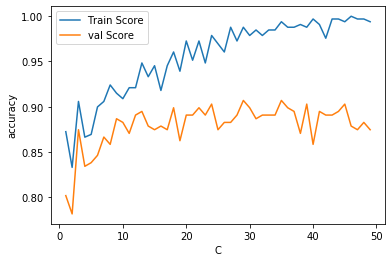

In [42]:
#파라미터 변경 Hedden Layer
train_accuracy = []
val_accuracy = []
para_hidden = [c for c in range(1,50)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    val_accuracy.append(nn.score(df_val_x,df_val_y))
    
df_score_hidden = pd.DataFrame()
df_score_hidden["HiddenLayer"]=para_hidden
df_score_hidden["TrainAccuracy"]=train_accuracy
df_score_hidden["valAccuracy"]=val_accuracy
df_score_hidden.round(3)

plt.plot(para_hidden, train_accuracy,linestyle="-",label = "Train Score")
plt.plot(para_hidden, val_accuracy,linestyle="-",label = "val Score")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\achin\tf1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


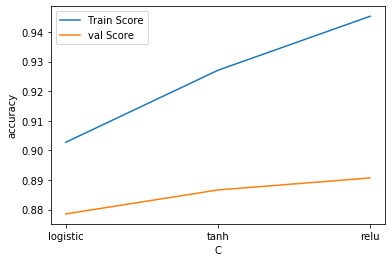

In [43]:
#파라미터 변경 Activation
train_accuracy = []
val_accuracy = []
para_function = ["logistic","tanh","relu"]

for v_function in para_function:
    nn = MLPClassifier(activation=v_function,random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    val_accuracy.append(nn.score(df_val_x,df_val_y))
    
df_score_function= pd.DataFrame()
df_score_function["ActivationFunction"]=para_function
df_score_function["TrainAccuracy"]=train_accuracy
df_score_function["ValAccuracy"]=val_accuracy
df_score_function.round(3)

plt.plot(para_function, train_accuracy,linestyle="-",label = "Train Score")
plt.plot(para_function, val_accuracy,linestyle="-",label = "val Score")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

# 스케일 변화

In [44]:
df_scaled_train_x

NameError: name 'df_scaled_train_x' is not defined

In [45]:
nn_scaled=MLPClassifier(random_state=1234,hidden_layer_sizes=(80,80,80,80,80,80,80),solver="adam",activation="relu")
nn_scaled.fit(df_scaled_train_x,df_train_y)
print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_scaled.score(df_scaled_val_x,df_val_y)))

NameError: name 'df_scaled_train_x' is not defined

In [ ]:
#파라미터 변경 Hedden Layer
train_accuracy = []
val_accuracy = []
para_hidden = [20**c for c in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden,random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
    
df_score_hidden = pd.DataFrame()
df_score_hidden["HiddenLayer"]=para_hidden
df_score_hidden["TrainAccuracy"]=train_accuracy
df_score_hidden["valAccuracy"]=val_accuracy
df_score_hidden.round(3)

plt.plot(para_hidden, train_accuracy,linestyle="-",label = "Train Score")
plt.plot(para_hidden, val_accuracy,linestyle="-",label = "val Score")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
#파라미터 변경 Activation
train_accuracy = []
val_accuracy = []
para_function = ["logistic","tanh","relu"]

for v_function in para_function:
    nn = MLPClassifier(activation=v_function,random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
    
df_score_function= pd.DataFrame()
df_score_function["ActivationFunction"]=para_function
df_score_function["TrainAccuracy"]=train_accuracy
df_score_function["ValAccuracy"]=val_accuracy
df_score_function.round(3)

plt.plot(para_function, train_accuracy,linestyle="-",label = "Train Score")
plt.plot(para_function, val_accuracy,linestyle="-",label = "val Score")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
#파라미터 변경 Solver
train_accuracy = []
val_accuracy = []
para_solver = ["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn = MLPClassifier(activation=v_solver,random_state=1234,hidden_layer_sized=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
    
df_score_solver= pd.DataFrame()
df_score_solver["Solver"]=para_function
df_score_solver["TrainAccuracy"]=train_accuracy
df_score_solver["ValAccuracy"]=val_accuracy
df_score_function.round(3)

plt.plot(para_solver, train_accuracy,linestyle="-",label = "Train Score")
plt.plot(para_solver, val_accuracy,linestyle="-",label = "val Score")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
#파라미터 변경 Mini Batch
train_accuracy = []
val_accuracy = []
para_batch = [20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",random_state=1234,hidden_layer_sized=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(nn.score(df_scaled_val_x,df_val_y))
    
df_score_solver= pd.DataFrame()
df_score_solver["Solver"]=para_batch
df_score_solver["TrainAccuracy"]=train_accuracy
df_score_solver["ValAccuracy"]=val_accuracy
df_score_function.round(3)

plt.plot(para_batch, train_accuracy,linestyle="-",label = "Train Score")
plt.plot(para_batch, val_accuracy,linestyle="-",label = "val Score")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [ ]:
nn_final= MLPClassifier(solver="adam",activation="relu",hidden_layer_sized=(4,4,4,4,4),random_state=1234)
nn_final.fit(df_scaled_train_x, df_train_y)


In [ ]:
y_pred=nn_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(nn_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

# 랜덤포레스트

In [46]:
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
#valid 데이터 설명력
print("Accuracy on valid set:{:.3f}".format(rf_uncustomized.score(df_val_x,df_val_y)))
#모델 설명력은 train 100%, test 93.5%로 모델은 train 데이터에 과대적합

Accuracy on training set:1.000
Accuracy on valid set:0.935


In [47]:
y_pred=rf_uncustomized.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.938

Confusion matrix:
[[101   2]
 [  7  34]]


In [ ]:
#n_estimators:트리 수 변경에 따른 모델 성능
train_accuracy=[];valid_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["n_estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidAccuracy"]=valid_accuracy

In [ ]:
df_accuracy_n.round(3)
plt.plot(para_n_tree,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_n_tree,valid_accuracy,linestyle='-',label='Valid Accuracy')
plt.xlabel("n_estimators");plt.ylabel("accuracy")
plt.legend()
#생성하는 결정 트리 수 증가에 따라 모델의 정확도는 증가
#Test/valid 데이터의 성능 변화를 고려하여 60 선정
#valid 데이터의 성능 변화를 고려하여 100 선정 가능
#n_estimators=60

In [ ]:
#max depth에 따른 모델 성능
train_accuracy=[];valid_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=30,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["ValidAccuracy"]=valid_accuracy

In [ ]:
df_accuracy_n.round(3)
plt.plot(para_depth,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_depth,valid_accuracy,linestyle='-',label='Valid Accuracy')
plt.xlabel("max depth");plt.ylabel("accuracy")
plt.legend()
#최대 깊이 증가에 따라 모델의 정확도는 증가
#하지만 깊이가 너무 커지면 overfitting의 위험이 존재
#Test/valid 데이터의 성능 변화를 고려하여 3 선정


In [ ]:
#min samples split 분리 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy=[];valid_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=4,n_estimators=100,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_val_x,df_val_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["ValidAccuracy"]=valid_accuracy

In [ ]:

plt.plot(para_split,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_split,valid_accuracy,linestyle='--',label='Valid Accuracy')
plt.xlabel("min samples split");plt.ylabel("accuracy")
plt.legend()
#분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소하나
#test 데이터의 성능 변화를 고려하면 70까지는 영향이 없으며
#80부터 자료 수가 커서 underfitting이 일어남
#min samples split=70df_accuracy_leaf.round(3)

In [ ]:
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
#valid 데이터 설명력
print("Accuracy on valid set:{:.3f}".format(rf_uncustomized.score(df_val_x,df_val_y)))
#모델 설명력은 train 100%, test 93.5%로 모델은 train 데이터에 과대적합

In [ ]:
y_pred=nn_uncustomized.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(nn_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

In [ ]:
#GridSearchCV를 이용한 최적 parameter 찾기
estimator=RandomForestClassifier(n_estimators=100,random_state=1234)

param_grid={"max_depth":para_depth,"min_samples_leaf":para_leaf}

grid_rf=GridSearchCV(estimator, param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_train_x,df_train_y)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest estimator model:\n{}".format(grid_rf.best_params_))
print("\nbest estimator model:\n{}".format(grid_rf.best_score_.round(3)))

### 최적모델

In [20]:
rf_uncustomized=RandomForestClassifier(random_state=1234, max_depth=8, min_samples_leaf=2,n_estimators=100)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
#valid 데이터 설명력
print("Accuracy on valid set:{:.3f}".format(rf_uncustomized.score(df_val_x,df_val_y)))
#모델 설명력은 train 100%, test 93.5%로 모델은 train 데이터에 과대적합

Accuracy on training set:0.985
Accuracy on valid set:0.935


MSE: 0.04861111111111111
MAE: 0.04861111111111111
RMSE: 0.22047927592204922
MAPE: inf


c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\achin\tf1\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, f

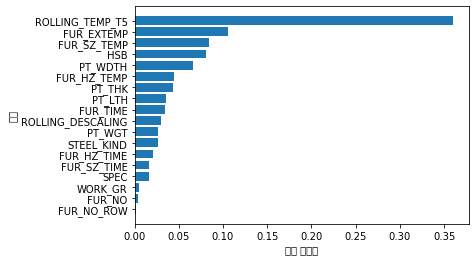

In [21]:
v_feature_name=df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_uncustomized.feature_importances_
df_importance.sort_values("Importance",ascending=False, inplace = True)
df_importance.round(3)

y_pred=tree_final.predict(df_test_x)

df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")


print ('MSE:', mean_squared_error(df_test_y, y_pred))
print ('MAE:', mean_absolute_error(df_test_y, y_pred))
print('RMSE:',root_mean_squared_error(df_test_y, y_pred))
print('MAPE:',mean_absolute_percentage_error(df_test_y, y_pred))

In [49]:
y_pred=rf_uncustomized.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.938

Confusion matrix:
[[101   2]
 [  7  34]]


### importance

In [ ]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_uncustomized.feature_importances_
#df_importance 의 table을 중요도 순으로 정렬

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)
df_importance.head(20)

In [ ]:
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("variance importance")
plt.ylabel("variance")


# 그래디언트 부스팅

In [ ]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))
y_pred=nn_uncustomized.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

In [ ]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators= v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [ ]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

# 모델 설명력 그래프를 통해 n-estimator 값을 30으로 선택한다.

In [ ]:
train_score = []; test_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=80, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [ ]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

# 모델 설명력 그래프를 통해 min-samples-leaf 값을 7로 선택한다.

In [ ]:
train_score=[];test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80, min_samples_leaf=4,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_split=pd.DataFrame()
df_score_split["MinSamplesSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["TestScore"]=test_score

# 그래디언트 부스팅에서 min-samples-split의 최소 자료 수 변경에 따른 모델의 성능을 분석한다.
# 위에서 정한 잎사귀 노드 값을 식에 반영한다.

In [ ]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()


In [ ]:
train_score=[];test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80,min_samples_leaf=4,min_samples_split=15,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["TestScore"]=test_score

# 그래디언트 부스팅에서 depth의 최소 자료 수 변경에 따른 모델의 성능을 분석한다.
# 위에서 정한 min-samples-split 값을 식에 반영한다.

In [ ]:
plt.plot(para_depth,train_score,linestyle='-',label="Train Score")
plt.plot(para_depth,test_score,linestyle='--',label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

# 모델 설명력 그래프를 통해 depth 값을 4로 선택한다.

In [ ]:
train_score=[];test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=80,min_samples_leaf=4,min_samples_split=15,\
                                 max_depth=6, learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
df_score_lr=pd.DataFrame()
df_score_lr["Depth"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["TestScore"]=test_score

In [ ]:
plt.plot(para_lr,train_score,linestyle='-',label="Train Score")
plt.plot(para_lr,test_score,linestyle='--',label="Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

# 모델 설명력 그래프를 통해 learning_rate 값을 0.2로 선택한다.

# 최적모델

In [51]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=80, min_samples_leaf=4, min_samples_split=15, max_depth=4,\
                                    learning_rate=0.3)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on validation set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.999
Score on validation set:0.854


In [52]:
y_pred=rf_uncustomized.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(rf_uncustomized.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy:0.938

Confusion matrix:
[[101   2]
 [  7  34]]


In [ ]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)
df_importance.head(20)

In [ ]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 로지스틱 회귀

In [53]:
df_raw.keys()

Index(['SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
       'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP',
       'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'HSB',
       'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [54]:
df_train,df_test,=train_test_split(df_raw,test_size=0.3,random_state=1234)

In [55]:
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_LTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+
+ROLLING_DESCALING+WORK_GR""",df_train)

In [56]:
log_result=log_model.fit()

         Current function value: 0.239838
         Iterations: 35


c:\users\achin\tf1\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [57]:
print(log_result.summary())

                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                           17
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.6207
Time:                        03:29:48   Log-Likelihood:                -120.88
converged:                      False   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 1.533e-73
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8688    541.808     -0.002      0.999   -1062.793    1061.056
SPEC                  0.0988      0.227      0.435      0.664      -0.347       0.544
STEEL_KIND           -0.

In [58]:
#후진제거법 이용

In [59]:
# FUR_SZ_TEMP   삭제
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_LTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+HSB+
+ROLLING_DESCALING+WORK_GR""",df_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.239838
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                           17
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.6207
Time:                        03:29:50   Log-Likelihood:                -120.88
converged:                      False   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 1.533e-73
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8687    542.650     -0.002      0.999   -1064.442    1062.705
SPEC                  0.0988      0.227     

c:\users\achin\tf1\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [60]:
# HSB  삭제
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_LTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+
+ROLLING_DESCALING+WORK_GR""",df_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.336558
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      487
Method:                           MLE   Df Model:                           16
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4677
Time:                        03:29:50   Log-Likelihood:                -169.63
converged:                       True   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 6.262e-54
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3205      0.167     -7.888      0.000      -1.649      -0.992
SPEC    

In [61]:
# FUR_HZ_TEMP +WORK_GR 삭제
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_LTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TIME+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+
+ROLLING_DESCALING""",df_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.337806
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      489
Method:                           MLE   Df Model:                           14
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4658
Time:                        03:29:51   Log-Likelihood:                -170.25
converged:                       True   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 5.341e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3022      0.165     -7.900      0.000      -1.625      -0.979
SPEC    

In [62]:
# +FUR_TIME  삭제
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_LTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TIME+FUR_SZ_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+
+ROLLING_DESCALING""",df_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.338451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                           13
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4647
Time:                        03:29:57   Log-Likelihood:                -170.58
converged:                       True   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 1.494e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.3020      0.165     -7.894      0.000      -1.625      -0.979
SPEC    

In [63]:
# +PT_LTH  삭제
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TIME+FUR_SZ_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+
+ROLLING_DESCALING""",df_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.340294
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                           12
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4618
Time:                        03:29:57   Log-Likelihood:                -171.51
converged:                       True   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 7.203e-56
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2898      0.164     -7.842      0.000      -1.612      -0.967
SPEC    

In [64]:
# ++FUR_SZ_TIME  삭제
log_model=Logit.from_formula("""SCALE~ +SPEC+STEEL_KIND+PT_THK+PT_WDTH+PT_WGT+FUR_NO+FUR_NO_ROW+FUR_HZ_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+
+ROLLING_DESCALING""",df_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.340580
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           11
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4614
Time:                        03:29:58   Log-Likelihood:                -171.65
converged:                       True   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 1.560e-56
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2945      0.165     -7.865      0.000      -1.617      -0.972
SPEC    

In [65]:
# +FUR_NO_ROW +SPEC +PT_WGT +FUR_NO   삭제
log_model=Logit.from_formula("""SCALE~ +STEEL_KIND+PT_THK+PT_WDTH+FUR_EXTEMP+ROLLING_TEMP_T5
+ROLLING_DESCALING""",df_train)
log_result=log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.345795
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Nov 2020   Pseudo R-squ.:                  0.4531
Time:                        03:29:58   Log-Likelihood:                -174.28
converged:                       True   LL-Null:                       -318.68
Covariance Type:            nonrobust   LLR p-value:                 2.046e-59
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2768      0.163     -7.820      0.000      -1.597      -0.957
STEEL_KI

In [66]:
결론: R=sq가 43%여서 사용가능할것같지 않음

SyntaxError: invalid syntax (<ipython-input-66-8c8a097bf312>, line 1)

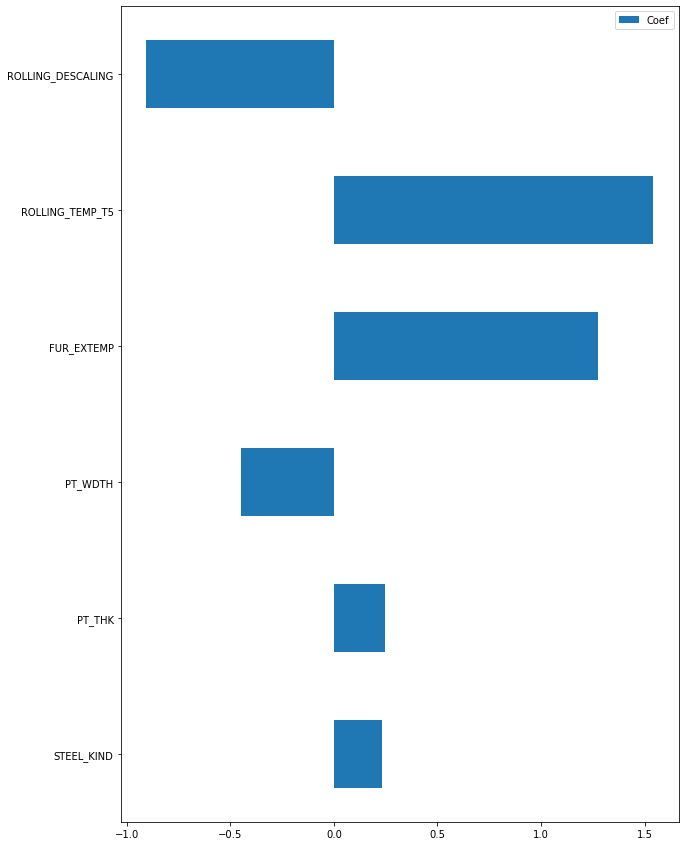

In [67]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]},index=log_model.exog_names[1:])

df_logistic_coef.plot.barh(y="Coef",figsize=(10,15))

In [ ]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]},index=log_model.exog_names[1:])

df_logistic_coef.plot.barh(y="Coef",figsize=(10,15))

# SVC

In [ ]:
# scaled 조정 후 모델 재실행

svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_train_x, df_train_y)
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(svm_scaled.score(df_val_x, df_val_y)))

In [ ]:
#평가
y_pred = svm_scaled.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix\n{}".format(confusion_matrix(df_test_y,y_pred)))

In [ ]:
# c ~ 규제에 대한 강도 변경
train_accuracy = []; test_accuracy=[]
para_c = [10**c for c in range(-2,4)]

for v_C in para_c:
    svm = SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_val_x, df_val_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] =test_accuracy

In [ ]:
plt.plot(para_c, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_c, test_accuracy, linestyle='-', label='ValAccuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()

In [ ]:
# Gamma
train_accuracy = []; test_accuracy=[]
para_gamma = [10**gamma for gamma in range(-4,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=10, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_val_x, df_val_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] =test_accuracy

In [ ]:
plt.plot(para_gamma, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_gamma, test_accuracy, linestyle='-', label='ValAccuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()

### final 모델

In [68]:
svc_final = SVC(gamma=0.1, C=10, random_state=1234)
svc_final.fit(df_train_x, df_train_y)

y_pred = svc_final.predict(df_test_x)
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(svc_final.score(df_test_x, df_test_y)))
print('Confusion matirx:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:1.000
Accuracy on test set:0.847
Confusion matirx:
[[92 11]
 [11 30]]


# 범주형 변수도 확인

In [ ]:
df_new=df_raw[['STEEL_KIND','SCALE']]
df_new.boxplot(figsize=(10,10),by='STEEL_KIND')

In [ ]:
sns.pairplot(df_raw[['STEEL_KIND','SCALE']])

In [ ]:
plt.hist(df_new['FUR_TIME'])